In [1]:
import numpy as np

values = np.array([1,2,3,4])
probabilities = np.array([0.1,0.3,0.2,0.4])
np.sum(values * probabilities).round(3)

np.float64(2.9)

In [2]:
values = np.array([1,2,3,4])
probabilities = np.array([0.1,0.3,0.2,0.4])
np.sum((values - 2.9) **2 * probabilities).round(3)

np.float64(1.09)

In [3]:
# SciPy를 이용한 베르누이 확률분포의 활용

from scipy.stats import bernoulli

bernoulli.pmf(k, p)
bernoulli.cdf(k, p)
bernoulli.ppf(q, p)
bernoulli.rvs(p, size, random_state)

NameError: name 'k' is not defined

In [4]:
from scipy.stats import bernoulli
prob = bernoulli.pmf(1, 0.6)
print(prob)

0.6


In [ ]:
from scipy.stats import binom
binom.pmf(k,n,p)
binom.cdf(k,n,p)
binom.ppf(q,n,p)
binom.rvs(n, p, size, random_state)

In [5]:
from scipy.stats import binom
prob1 = binom.pmf(4, n=10, p=0.5)
print(prob1)

0.2050781249999999


In [7]:
prob2 = 1- binom.cdf(3, n=10, p=0.5)
print(prob2)

0.828125


In [ ]:
from scipy.stats import poisson
poisson.pmf(k, mu)
poisson.cdf(k, mu)
poisson.ppf(q, mu)
poisson.ppf(mu, size, random_state)

In [8]:
from scipy.stats import poisson
prob1 = poisson.pmf(3, mu=2)
print(prob1)

0.18044704431548356


In [9]:
# 생존함수를 활용하여 푸아송 분포 계산하기

prob2 = poisson.sf(4, mu=2)
print(prob2)

0.052653017343711125


In [10]:
1- poisson.cdf(4, mu=2)

np.float64(0.052653017343711084)

In [11]:
# 이항분포로 풀기

from scipy.stats import binom
1 - binom.cdf(4, 100, 0.05)

np.float64(0.5640186993142899)

In [12]:
# 푸아송분포로 근사하여 풀기 (p<=0.05, n>=20)

from scipy.stats import poisson
1 - poisson.cdf(4,mu=5)

np.float64(0.5595067149347874)

In [ ]:
from scipy.stats import norm
norm.pdf(x, mu, sigma)
norm.cdf(x, mu, sigma)
norm.ppf(q, mu, sigma)
norm.rvs(mu, sigma, size, random_state)

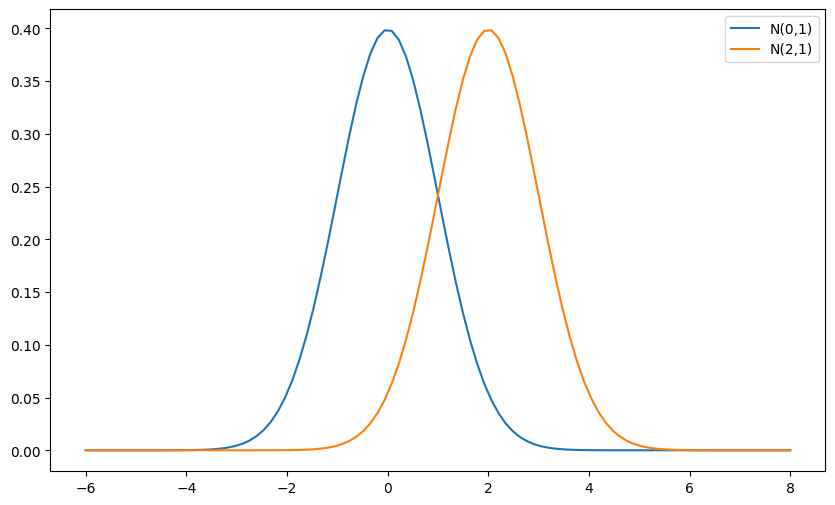

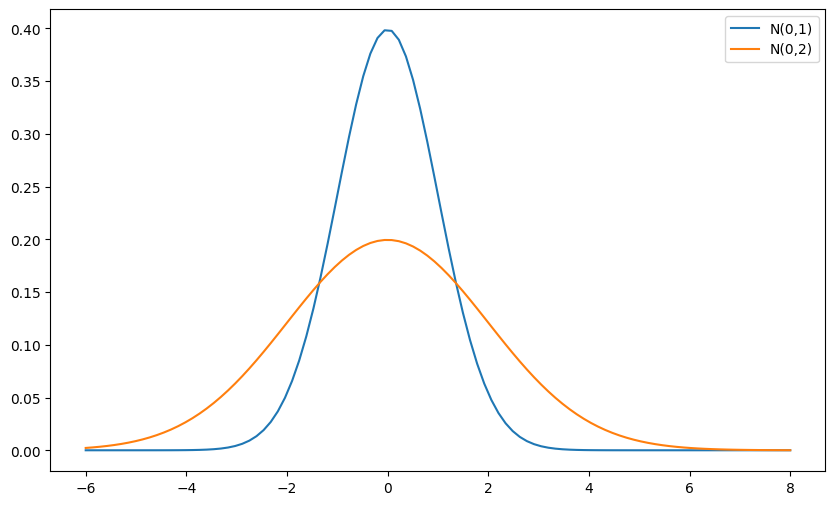

In [13]:
# 정규분포 평균과 분산의 의미

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 정규분포의 평균과 표준편차 설정
mu1, sigma1 = 0, 1 # 첫 번째 정규분포
mu2, sigma2 = 2, 1 # 두 번째 정규분포
mu3, sigma3 = 0, 2 # 세 번째 정규분포

# x값 생성
x = np.linspace(mu1-3*sigma3, mu2+3*sigma3, 100)

# 확률밀도함수 계산
pdf1=norm.pdf(x, mu1, sigma1)
pdf2=norm.pdf(x, mu2, sigma2)
pdf3=norm.pdf(x, mu3, sigma3)

# 두 정규분포의 확률밀도함수, x축은 값, y축은 밀도

# 첫 번째 그래프 그리기
plt.figure(figsize=(10,6))
plt.plot(x, pdf1, label='N(0,1)')
plt.plot(x, pdf2, label='N(2,1)')
plt.legend()
plt.show()

# 두 번째 그래프 그리기
plt.figure(figsize=(10,6))
plt.plot(x,pdf1, label='N(0,1)')
plt.plot(x,pdf3, label='N(0,2)')
plt.legend()
plt.show()

In [14]:
from scipy.stats import norm
prob1 = norm.sf(85, 70, 10)
print(prob1)

0.06680720126885807


In [15]:
from scipy.stats import norm
prob_between = norm.cdf(75,70,10) - norm.cdf(65,70,10)
print(prob_between)

0.38292492254802624


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 모집단의 평균과 표준편차, 표본크기 = n
mu = 70; sigma= 10; n=8

# 시뮬레이션 횟수
simulations = 10000

# 표본 추출
my_sample = np.random.normal(mu, sigma, (simulations, n))

In [17]:
# 모집단에서 표본 크기 n만큼 무작위로 추출하여 표본평균을 계산

sample_means = np.mean(my_sample, axis=1)
sample_means.shape

(10000,)

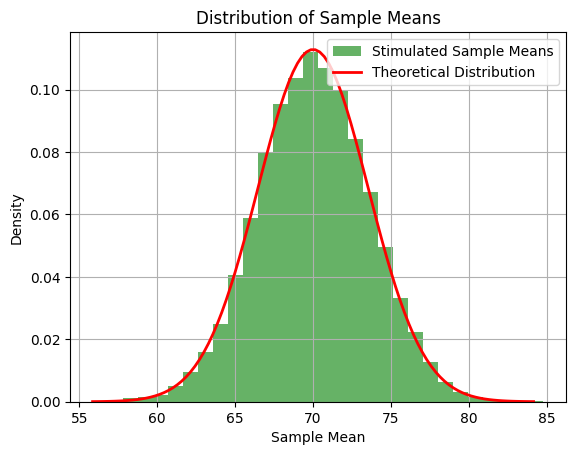

In [18]:
# 표본 평균의 이론적 표준편차
sample_mean_std = sigma / np.sqrt(n)

# 시뮬레이션된 표본평균의 분포를 히스토그램으로 시각화
plt.hist(sample_means, bins = 30, density = True, alpha = 0.6, color = 'g', label ='Stimulated Sample Means')

# 이론적 표본평균의 정규분포를 겹쳐서 시각화
x = np.linspace(mu-4*sample_mean_std, mu+4*sample_mean_std, 100)
plt.plot(x, norm.pdf(x, mu, sample_mean_std), 'r', lw=2, label = 'Theoretical Distribution')

plt.title('Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
from scipy.stats import norm
# 표본평균의 분포가 N(70, (10^2)/8)을 따름
prob = norm.sf(72, 70, 10/8**0.5)
print(prob)

0.28580382247666575


In [ ]:
from scipy.stats import chi2
chi2.pdf(x,df)
chi2.cdf(x,df)
chi2.ppf(q,df)
chi2.rvs(df, size, random_state)

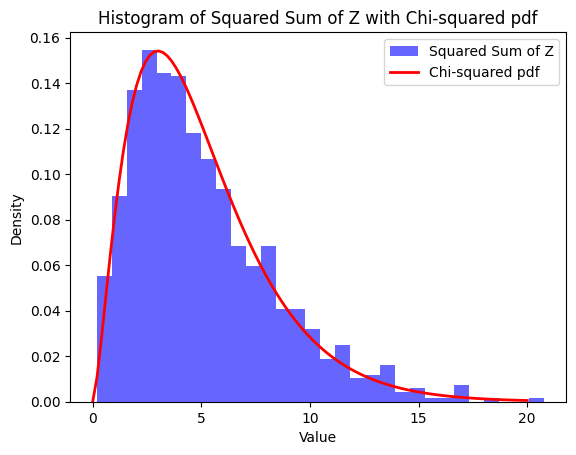

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm

# 표준 정규분포에서 5개의 표본을 뽑아 제곱합 계산을 1,000번 시행
x = norm.rvs(size=(1000,5))**2  # 1,000행 5열
samples = np.sum(x, axis=1)     # 행별 계산

# 히스토그램 그리기
plt.hist(samples, bins=30, density=True, alpha=0.6, color='blue', label = 'Squared Sum of Z')

# 카이제곱 분포 확률밀도함수와 겹쳐서 그리기
k = np.linspace(0,20,100)
plt.plot(k, chi2.pdf(k,5), color='red', lw=2, label = 'Chi-squared pdf')

plt.legend()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Squared Sum of Z with Chi-squared pdf')
plt.show()

In [ ]:
# scipy를 이용한 t분포의 활용

from scipy.stats import t
t.pdf(x, df)
t.cdf(x, df)
t.ppf(q, df)
t.rvs(df, size, random_state)

In [23]:
x = np.array([9.76, 11.1, 10.7, 10.72, 11.8, 6.15, 10.52, 14.83, 13.03, 16.46, 10.84, 12.45])
n = len(x)
x_bar = np.mean(x)
s = np.std(x, ddof=1)

# t 검정통계량 값 계산
t = (x_bar - 10)/(s/np.sqrt(n))
print(t)

2.0508338167773066


In [25]:
from scipy.stats import t
t.sf(2.050, df=11)

np.float64(0.0324878370178045)

In [26]:
from scipy.stats import t
t.ppf(0.95, df=11)

np.float64(1.7958848187036691)

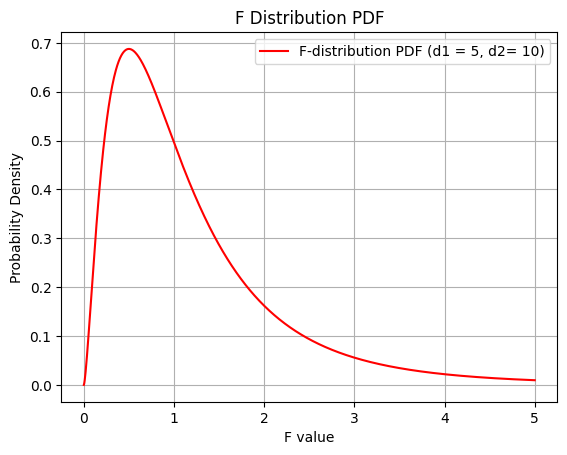

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# 자유도 설정
d1,d2 = 5,10

# x값 범위 설정
x = np.linspace(0,5,1000)

# F-분포의 확률밀도함수 계산
y = f.pdf(x,d1,d2)

# 그래프 그리기
plt.plot(x,y,'r-', label = f'F-distribution PDF (d1 = {d1}, d2= {d2})')
plt.title('F Distribution PDF')
plt.xlabel('F value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()